Record ID                                     0
Aircraft: Type                              129
Airport: Name                               129
Altitude bin                                129
Aircraft: Make/Model                          0
Wildlife: Number struck                     129
Wildlife: Number Struck Actual                0
Effect: Impact to flight                    129
FlightDate                                  129
Effect: Indicated Damage                      0
Aircraft: Number of engines?                267
Aircraft: Airline/Operator                  129
Origin State                                449
When: Phase of flight                       129
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4771
Wildlife: Size                              129
Conditions: Sky                               0
Wildlife: Species                       

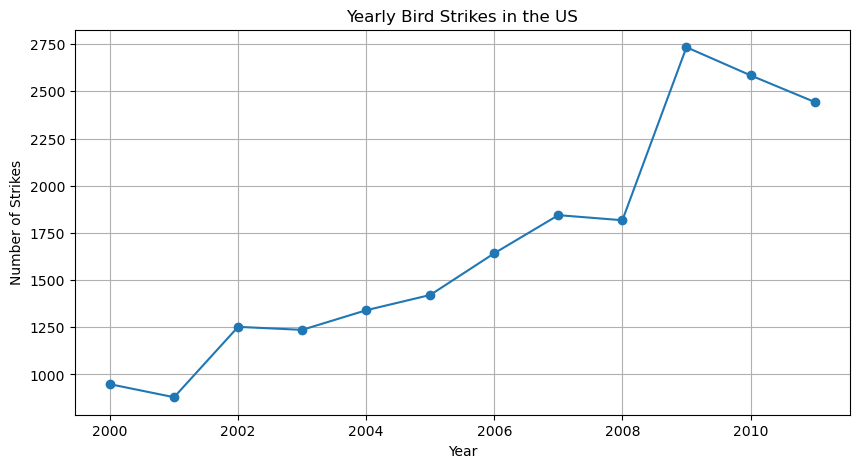

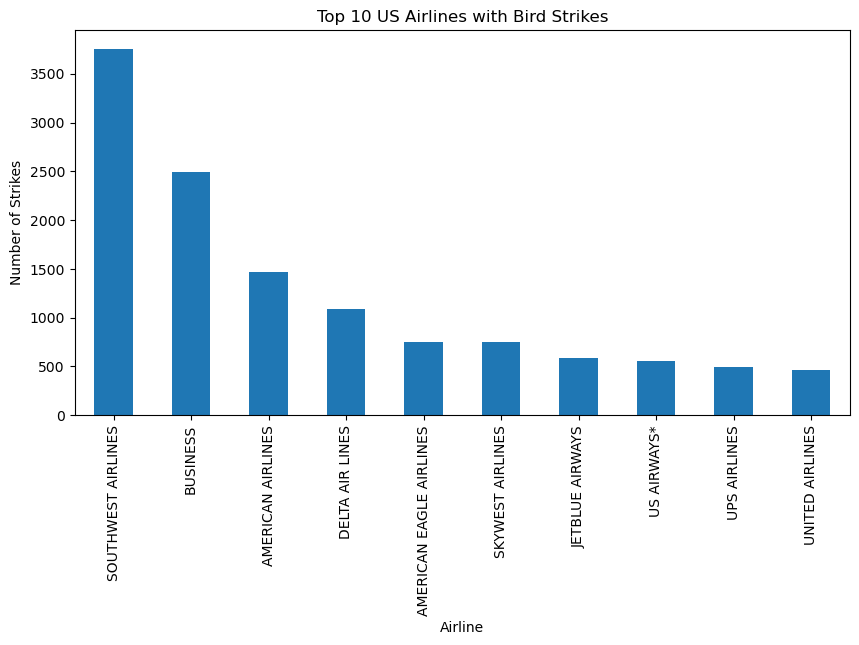

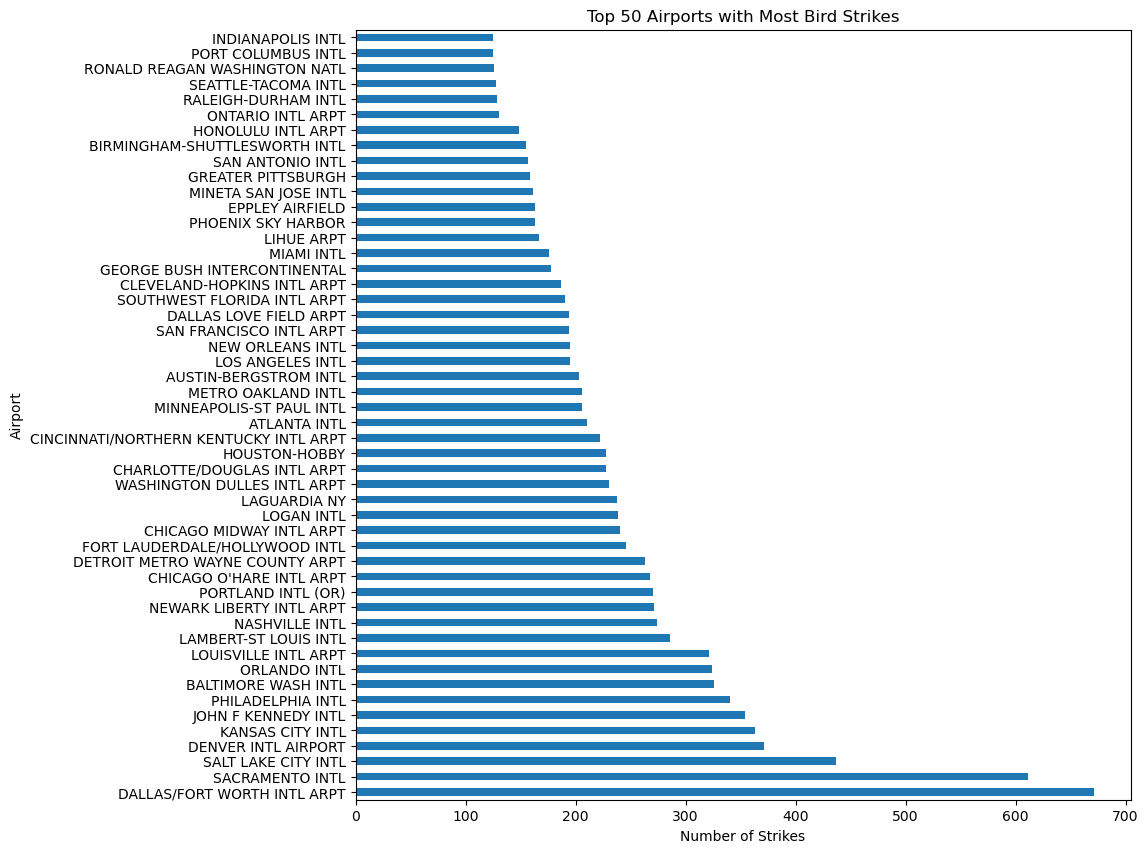

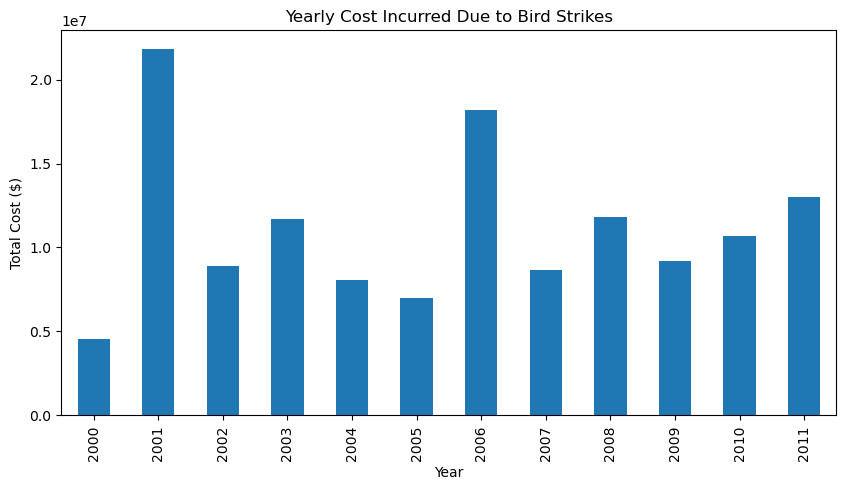

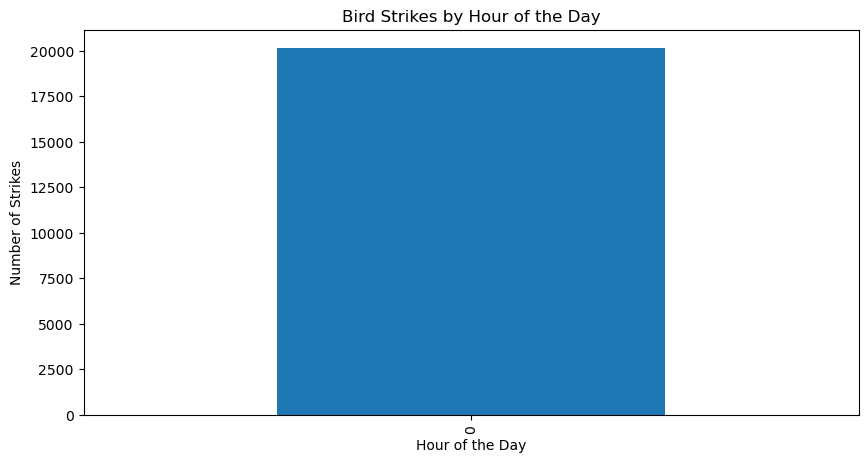

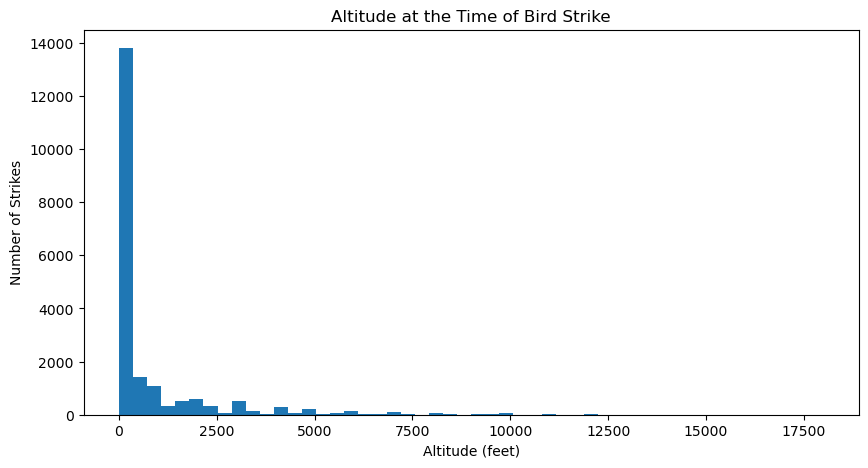

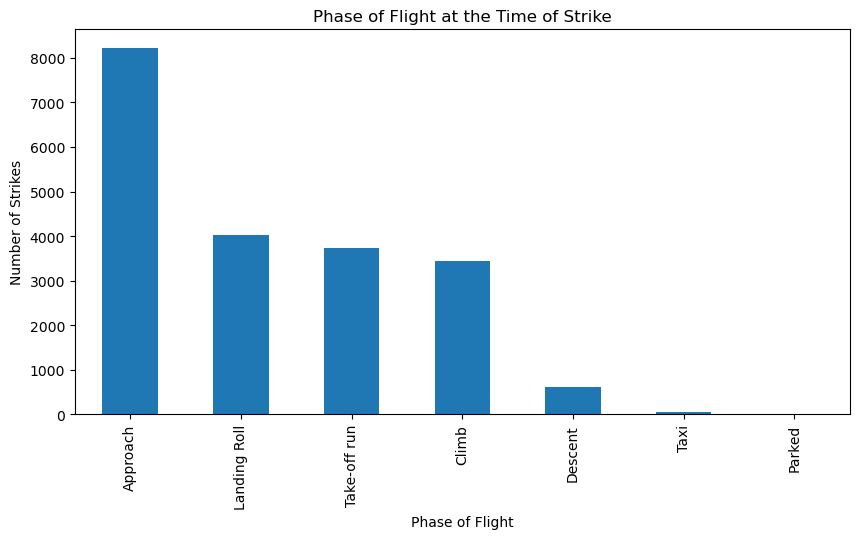

<Figure size 1000x500 with 0 Axes>

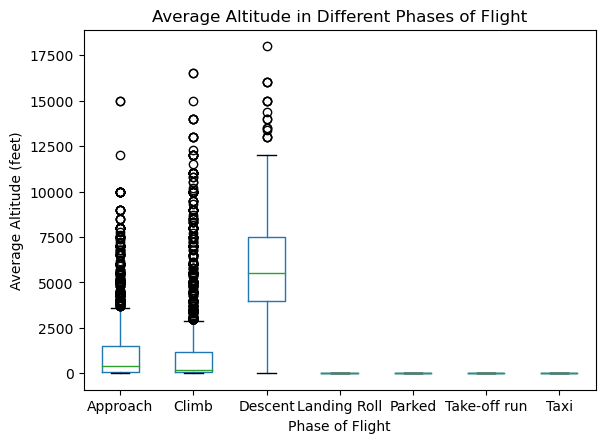

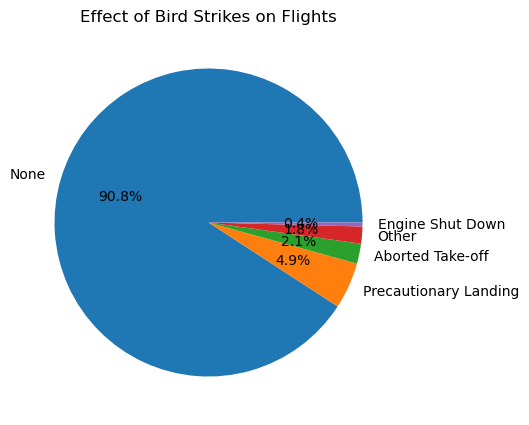

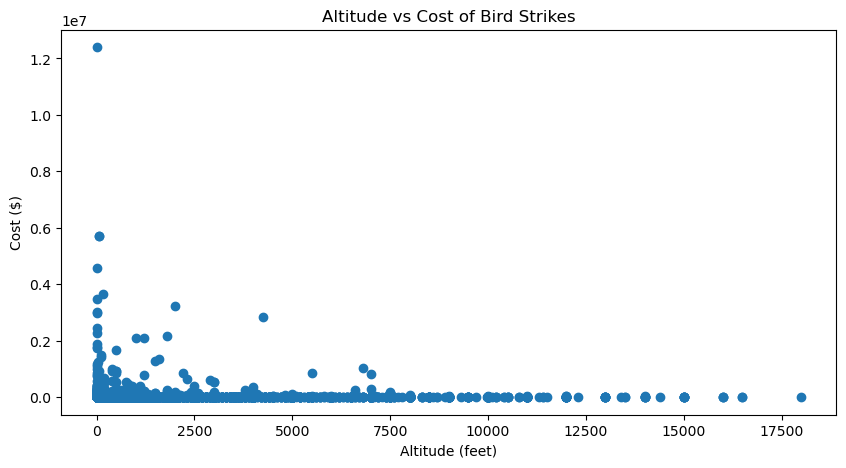

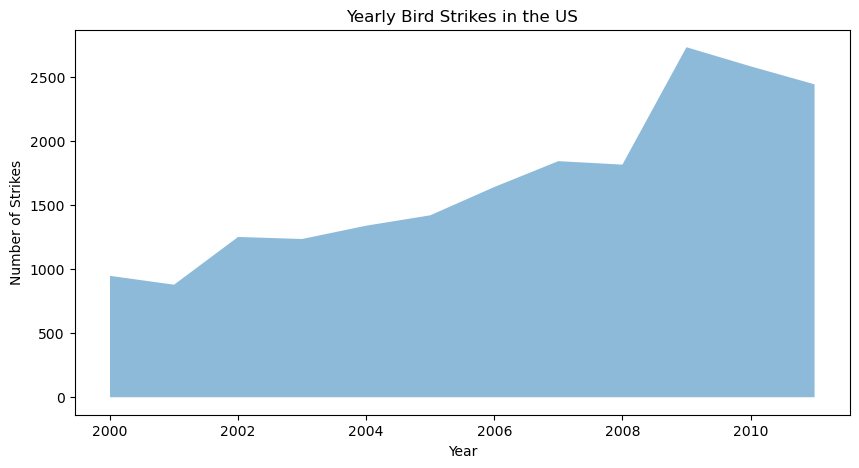

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r"D:\internship data analyst\project 3\Bird Strikes data.xlsx")
df.head()


# Data Preprocessing
print(df.isnull().sum())

# Drop rows with missing values for simplicity
df = df.dropna()

# Convert the FlightDate to datetime
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Extract the year and hour from FlightDate
df['year'] = df['FlightDate'].dt.year
df['hour'] = df['FlightDate'].dt.hour

# Yearly Bird Strikes in the US - Line Plot
yearly_strikes = df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(yearly_strikes.index, yearly_strikes.values, marker='o', linestyle='-')
plt.title('Yearly Bird Strikes in the US')
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.grid(True)
plt.show()

# Top 10 US Airlines with Bird Strikes - Bar Plot
top_airlines = df['Aircraft: Airline/Operator'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
top_airlines.plot(kind='bar')
plt.title('Top 10 US Airlines with Bird Strikes')
plt.xlabel('Airline')
plt.ylabel('Number of Strikes')
plt.show()

# Airports with Most Incidents – Top 50 - Horizontal Bar Plot
top_airports = df['Airport: Name'].value_counts().nlargest(50)
plt.figure(figsize=(10, 10))
top_airports.plot(kind='barh')
plt.title('Top 50 Airports with Most Bird Strikes')
plt.xlabel('Number of Strikes')
plt.ylabel('Airport')
plt.show()

# Yearly Cost Incurred Due to Bird Strikes - Bar Plot
yearly_cost = df.groupby('year')['Cost: Total $'].sum()
plt.figure(figsize=(10, 5))
yearly_cost.plot(kind='bar')
plt.title('Yearly Cost Incurred Due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.show()

# When Do Most Bird Strikes Occur? - Bar Plot
hourly_strikes = df['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
hourly_strikes.plot(kind='bar')
plt.title('Bird Strikes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Strikes')
plt.show()

# Altitude at the Time of Strike - Histogram
plt.figure(figsize=(10, 5))
plt.hist(df['Feet above ground'], bins=50)
plt.title('Altitude at the Time of Bird Strike')
plt.xlabel('Altitude (feet)')
plt.ylabel('Number of Strikes')
plt.show()

# Phase of Flight at the Time of Strike - Bar Plot
phase_counts = df['When: Phase of flight'].value_counts()
plt.figure(figsize=(10, 5))
phase_counts.plot(kind='bar')
plt.title('Phase of Flight at the Time of Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Strikes')
plt.show()

# Average Altitude in Different Phases of Flight - Box Plot
plt.figure(figsize=(10, 5))
df.boxplot(column='Feet above ground', by='When: Phase of flight', grid=False)
plt.title('Average Altitude in Different Phases of Flight')
plt.suptitle('')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude (feet)')
plt.show()

# Effect of Bird Strikes on Flights - Pie Chart
impact_counts = df['Effect: Impact to flight'].value_counts()
plt.figure(figsize=(10, 5))
impact_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Effect of Bird Strikes on Flights')
plt.ylabel('')
plt.show()

# Scatter Plot for Altitude vs Cost
plt.figure(figsize=(10, 5))
plt.scatter(df['Feet above ground'], df['Cost: Total $'])
plt.title('Altitude vs Cost of Bird Strikes')
plt.xlabel('Altitude (feet)')
plt.ylabel('Cost ($)')
plt.show()

# Area Plot for Yearly Bird Strikes in the US
plt.figure(figsize=(10, 5))
plt.fill_between(yearly_strikes.index, yearly_strikes.values, alpha=0.5)
plt.title('Yearly Bird Strikes in the US')
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.show()